In [1]:
import uproot
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
%ls

Untitled.ipynb                        xsec_file_birksrecomb.root
bins_01_22.pdf                        xsec_file_dataSCE.root
bins_24_40.pdf                        xsec_file_deadSaturatedChannels.root
covariance_detector.root              xsec_file_downPEnoise.root
make_det_cov_matrix.py                xsec_file_enhancedexttpcvis.root
xsec_file_CV.root                     xsec_file_lifetime10ms.root
xsec_file_DLdown.root                 xsec_file_noiseAmpDown.root
xsec_file_DLup.root                   xsec_file_noiseAmpUp.root
xsec_file_DTdown.root                 xsec_file_squeezeResp.root
xsec_file_DTup.root                   xsec_file_stretchResp.root
xsec_file_LArG4BugFix.root            xsec_file_upPEnoise.root
xsec_file_altDeadChannels.root        xsec_file_withDIC.root


In [3]:
f_cv = uproot.rootio.open('xsec_file_CV.root')
f_DLdown = uproot.rootio.open('xsec_file_DLdown.root')

f_cv.keys()

['xsec_onebin_CV;1',
 'smearing_matrix_mumom_CV;1',
 'xsec_mumom_CV;1',
 'xsec_mumom_mc_CV;1',
 'frac_covariance_matrix_mumom_CV;1',
 'smearing_matrix_muangle_CV;1',
 'xsec_muangle_CV;1',
 'xsec_muangle_mc_CV;1',
 'frac_covariance_matrix_muangle_CV;1',
 'xsec_muangle_mumom_CV;1',
 'xsec_muangle_mumom_mc_CV;1',
 'frac_covariance_matrix_muangle_mumom_CV;1',
 'smearing_matrix_muangle_mumom_poly_CV;1',
 'xsec_poly_muangle_mumom_CV;1',
 'xsec_poly_muangle_mumom_mc_CV;1',
 'covariance_matrix_poly_muangle_mumom_CV;1',
 'xsec_poly_muangle_mumom_CV_bin_0;1',
 'xsec_poly_muangle_mumom_CV_bin_1;1',
 'xsec_poly_muangle_mumom_CV_bin_2;1',
 'xsec_poly_muangle_mumom_CV_bin_3;1',
 'xsec_poly_muangle_mumom_CV_bin_4;1',
 'xsec_poly_muangle_mumom_CV_bin_5;1',
 'xsec_poly_muangle_mumom_CV_bin_6;1',
 'xsec_poly_muangle_mumom_CV_bin_7;1',
 'xsec_poly_muangle_mumom_CV_bin_8;1']

In [5]:
h_cv = f_cv['xsec_mumom_CV']
h_DLdown = f_DLdown['xsec_mumom_DLdown']

bins = h_cv.edges
a = 0.5*(bins[1:] + bins[:-1]) # midpoints of bins

h_cv.variances

array([  3.77497527e-04,   2.40314152e-03,   1.50072759e-03,
         3.15890627e-04,   8.27042682e-05,   5.84974596e-06])

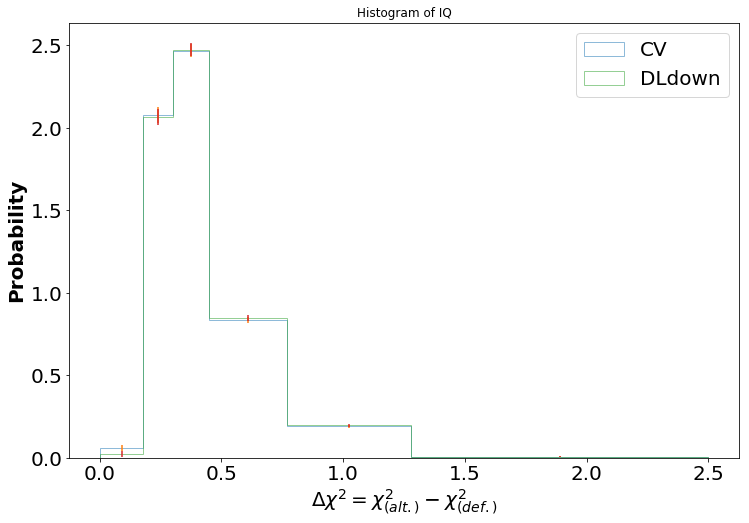

In [7]:
fig = plt.figure(figsize=(12,8),facecolor='w')
plt.tick_params(labelsize=20)

n, bins, patches = plt.hist(a, bins=h_cv.edges, weights=h_cv.values, density=True, alpha=0.5, label='CV', histtype='step')
plt.errorbar(a, n, yerr=np.sqrt(h_cv.variances), fmt='none')

n, bins, patches = plt.hist(a, bins=h_DLdown.edges, weights=h_DLdown.values, density=True, alpha=0.5, label='DLdown', histtype='step')
plt.errorbar(a, n, yerr=np.sqrt(h_DLdown.variances), fmt='none')


plt.xlabel('$\\Delta\\chi^2 = \\chi^2_{(alt.)} - \\chi^2_{(def.)}$',fontsize=20,fontweight='bold')
plt.ylabel('Probability',fontsize=20,fontweight='bold')
plt.title('Histogram of IQ')
leg=plt.legend(fontsize=20,loc=1)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,8), nrows=2)

# fig = plt.figure(figsize=(12,8),facecolor='w')
plt.tick_params(labelsize=20)

n_CV, bins, patches_CV = ax1.hist(a, bins=h_cv.edges, weights=h_cv.values, density=True, alpha=0.5, label='CV', histtype='step')
n_DLdown, bins, patches_DLdown = ax1.hist(a, bins=h_DLdown.edges, weights=h_DLdown.values, density=True, alpha=0.5, label='DLdown', histtype='step')

plt.xlabel('$\\Delta\\chi^2 = \\chi^2_{(alt.)} - \\chi^2_{(def.)}$',fontsize=20,fontweight='bold')
plt.ylabel('Probability',fontsize=20,fontweight='bold')
plt.title('Histogram of IQ')
leg=plt.legend(fontsize=20,loc=1)
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)

n, bins, patches = ax2.hist(a, bins=h_cv.edges, weights=n_CV / n_DLdown, density=True, alpha=0.5, label='CV')

plt.show()

In [ ]:
0.5*(bins[1:] + bins[:-1])